### Convolutional autoencoder for denoising

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
num_epochs = 10

In [3]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [4]:
#To train it, we will use the original MNIST digits with shape (samples, 3, 28, 28),
# no flattening!!
# and we will just normalize pixel values between 0 and 1.

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [5]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


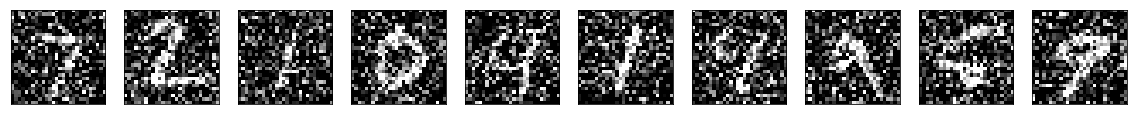

In [6]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [7]:
autoencoder.fit(x_train_noisy, x_train_noisy,
                epochs=num_epochs,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 344s - loss: 0.5376 - val_loss: 0.2383
Epoch 2/10
60000/60000 [==============================] - 376s - loss: 0.5012 - val_loss: 0.1507
Epoch 3/10
60000/60000 [==============================] - 453s - loss: 0.4904 - val_loss: 0.1637
Epoch 4/10
60000/60000 [==============================] - 460s - loss: 0.4834 - val_loss: 0.1293
Epoch 5/10
60000/60000 [==============================] - 1306s - loss: 0.4767 - val_loss: 0.1513
Epoch 6/10
60000/60000 [==============================] - 324s - loss: 0.4686 - val_loss: 0.1239
Epoch 7/10
60000/60000 [==============================] - 262s - loss: 0.4587 - val_loss: 0.1542
Epoch 8/10
60000/60000 [==============================] - 259s - loss: 0.4510 - val_loss: 0.1160
Epoch 9/10
60000/60000 [==============================] - 272s - loss: 0.4449 - val_loss: 0.1458
Epoch 10/10
60000/60000 [==============================] - 257s - loss: 0.43

In [8]:
decoded_imgs = autoencoder.predict(x_test_noisy)
decoded_imgs.shape

(10000, 28, 28, 1)

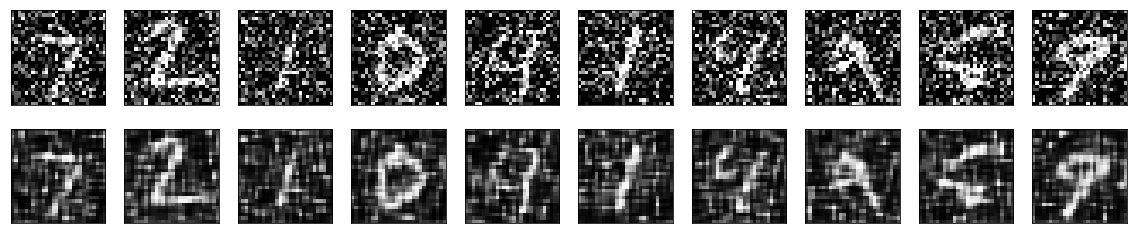

In [9]:

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 +n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()